# Moving Obeject detection in video

import libraries

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

%matplotlib inline
np.random.seed(42)

Capture the input video

In [2]:
cap = cv2.VideoCapture("E:/openCV project/objection detection/test.mp4")

Extract background in the video

In [3]:
# Randomly select 30 frames
frameIds = cap.get(cv2.CAP_PROP_FRAME_COUNT) * np.random.uniform(size=30)

# Store selected frames in an array
frames = []
for fid in frameIds:
    cap.set(cv2.CAP_PROP_POS_FRAMES, fid)
    ret, frame = cap.read()
    frames.append(frame)
    
cap.release()

calculate the median frames to remove outliers better

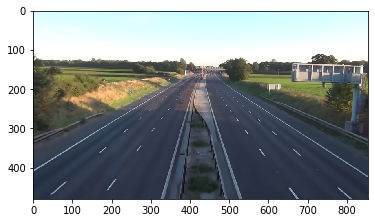

In [4]:
# Calculate the median along the time axis
medianFrame = np.median(frames, axis=0).astype(dtype=np.uint8)
medianFrame = cv2.cvtColor(medianFrame, cv2.COLOR_BGR2RGB)            # convert the color bgr to rgb
plt.imshow(medianFrame)

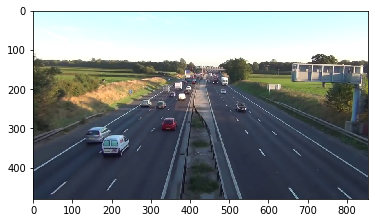

In [5]:
# processing a simple frame
sample_frame=frames[0]
sample_frame = cv2.cvtColor(sample_frame, cv2.COLOR_BGR2RGB)
plt.imshow(sample_frame)

In [6]:
grayMedianFrame = cv2.cvtColor(medianFrame, cv2.COLOR_BGR2GRAY)       # change median frame into gray scale

graySample=cv2.cvtColor(sample_frame, cv2.COLOR_BGR2GRAY)             # change sample frame into gray scale

Remove the background

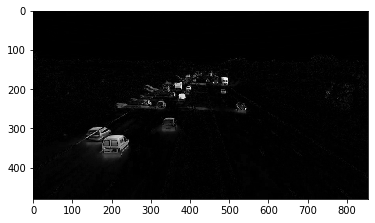

In [7]:
dframe = cv2.absdiff(graySample, grayMedianFrame)
plt.imshow(dframe, cmap = 'gray')

Gaussian blurring to reduce noise and enable easier identification of edges

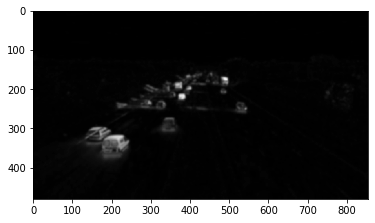

In [8]:
blurred = cv2.GaussianBlur(dframe, (11,11), 0)          #Gaussian blurring
plt.imshow(blurred, cmap='gray')

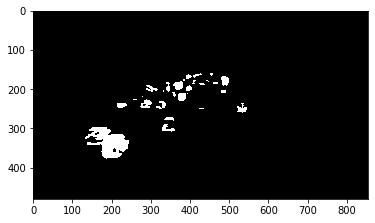

In [9]:
ret, tframe= cv2.threshold(blurred,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)        # thresholding
plt.imshow(tframe, cmap= 'gray') 

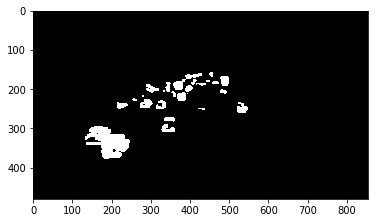

In [10]:
# apply image dilation
kernel = np.ones((3,3),np.uint8)
dilated = cv2.dilate(tframe, kernel,iterations = 1)

# plot dilated image
plt.imshow(dilated, cmap = 'gray')

contour and bounding box

In [11]:
cnts, _ = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2 .CHAIN_APPROX_SIMPLE)

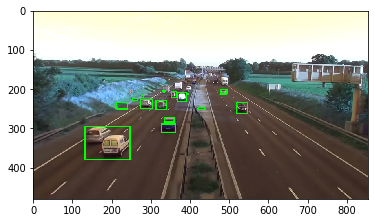

In [12]:
for cnt in cnts:
    x,y,w,h = cv2.boundingRect(cnt)
    if y > 200:  #Disregard item that are the top of the picture
        cv2.rectangle(sample_frame,(x,y),(x+w,y+h),(0,255,0),2)
        
plt.imshow(cv2.cvtColor(sample_frame, cv2.COLOR_BGR2RGB))

Processing the input video

In [13]:
cap = cv2.VideoCapture("E:/openCV project/objection detection/test.mp4")
total_frames= cap.get(cv2.CAP_PROP_FRAME_COUNT)
print(total_frames)                                  # total no of frame in video

626.0


In [14]:
writer = cv2.VideoWriter("output.mp4", cv2.VideoWriter_fourcc(*"MP4V"), 30,(640,480))     # save as output video

In [15]:
#frameCnt=0
#while(frameCnt < total_frames-1):
#    frameCnt+=1
while True:
    ret, frame = cap.read()
    
    # extract region of interest
    #roi = frame[0:400, 0:854] 

    # Convert current frame to grayscale
    gframe = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Calculate absolute difference of current frame and
    # the median frame
    dframe = cv2.absdiff(gframe, grayMedianFrame)
    # Gaussian blurring
    blurred = cv2.GaussianBlur(dframe, (11, 11), 0)
    #Thresholding to binarise
    ret, tframe= cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    #dilated 
    kernel = np.ones((3,3),np.uint8)
    dilated = cv2.dilate(tframe, kernel, iterations = 1)
    #Identifying contours from the threshold
    cnts, _ = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2 .CHAIN_APPROX_SIMPLE)
    
    #For each contour draw the bounding bos
    for cnt in cnts:
        # calculate area of contour to remove small element
        area = cv2.contourArea(cnt)
        x, y, w, h = cv2.boundingRect(cnt)
        if(y > 250 or area > 300):
            cv2.rectangle(frame, (x,y), (x+w, y+h), color= (0,255,0), thickness=2)
    
    
    cv2.imshow("Frame", frame)
    writer.write(cv2.resize(frame, (640,480)))
    
    key = cv2.waitKey(30)
    
    if(key ==27):    # press esc to break  
        break
        
cap.release()
writer.release()
cv2.destroyAllWindows()
    